#  What is Linear Regression Model in Machine Learning

Linear Regression is a Supervised Machine Learning Model for finding the relationship between independent variables and dependent variable. Linear regression performs the task to predict the response (dependent) variable value (y) based on a given (independent) explanatory variable (x). So, this regression technique finds out a linear relationship between x (input) and y (output).

# Fuel Consumption Dataset 

<span style="color:blue">The problem is to predict CO2 emissions from different type of cars</span>

# Importing Libraries 

In [105]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') ## We run this to suppress various deprecation warnings from plotnine - keeps our notebook cleaner


# Loading and analyzing the data

In [106]:
df=pd.read_csv("FuelConsumption.csv")

In [107]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [108]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [109]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


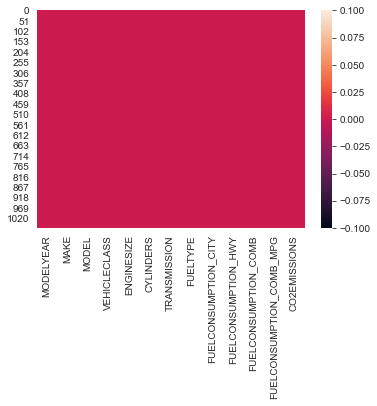

In [110]:
sns.heatmap(df.isnull())

So there is no null values in the data 

# Data Visualization 

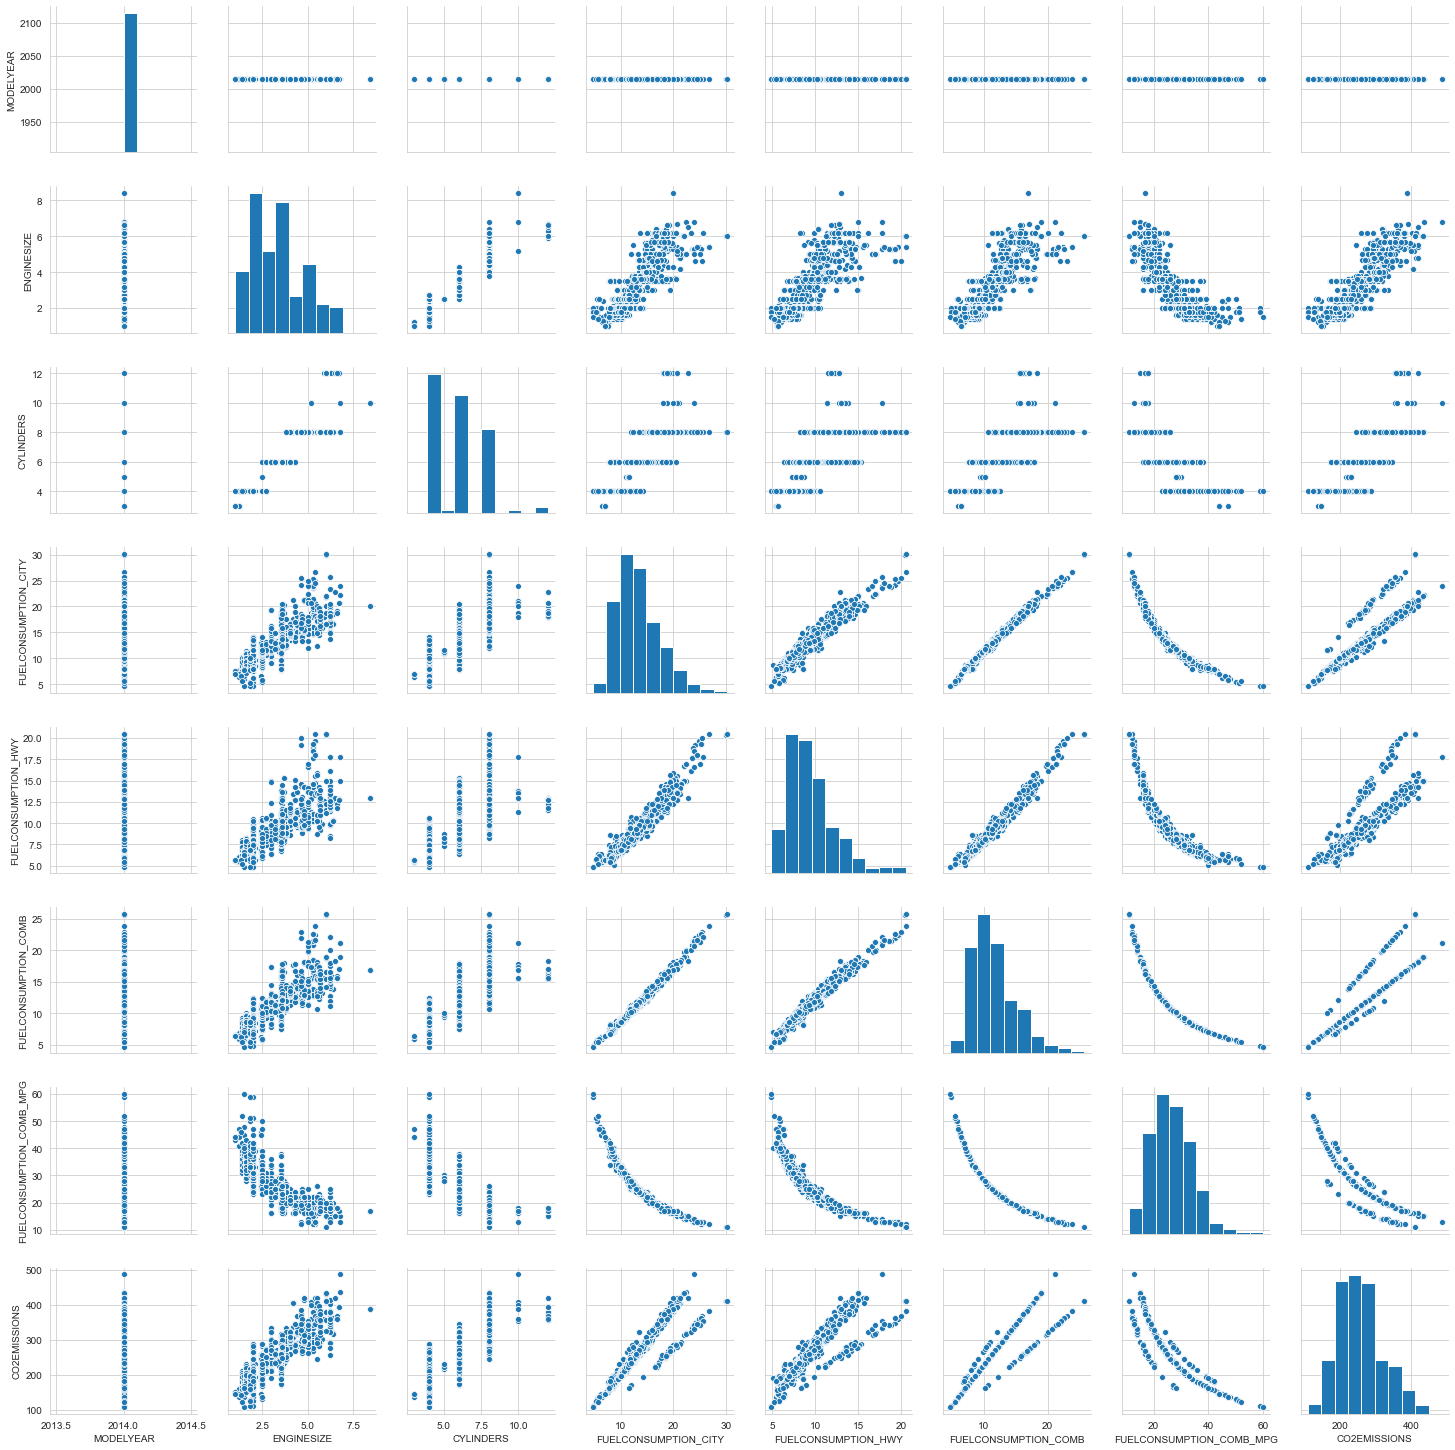

In [111]:
sns.set_style("whitegrid")
sns.pairplot(df)

In [112]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


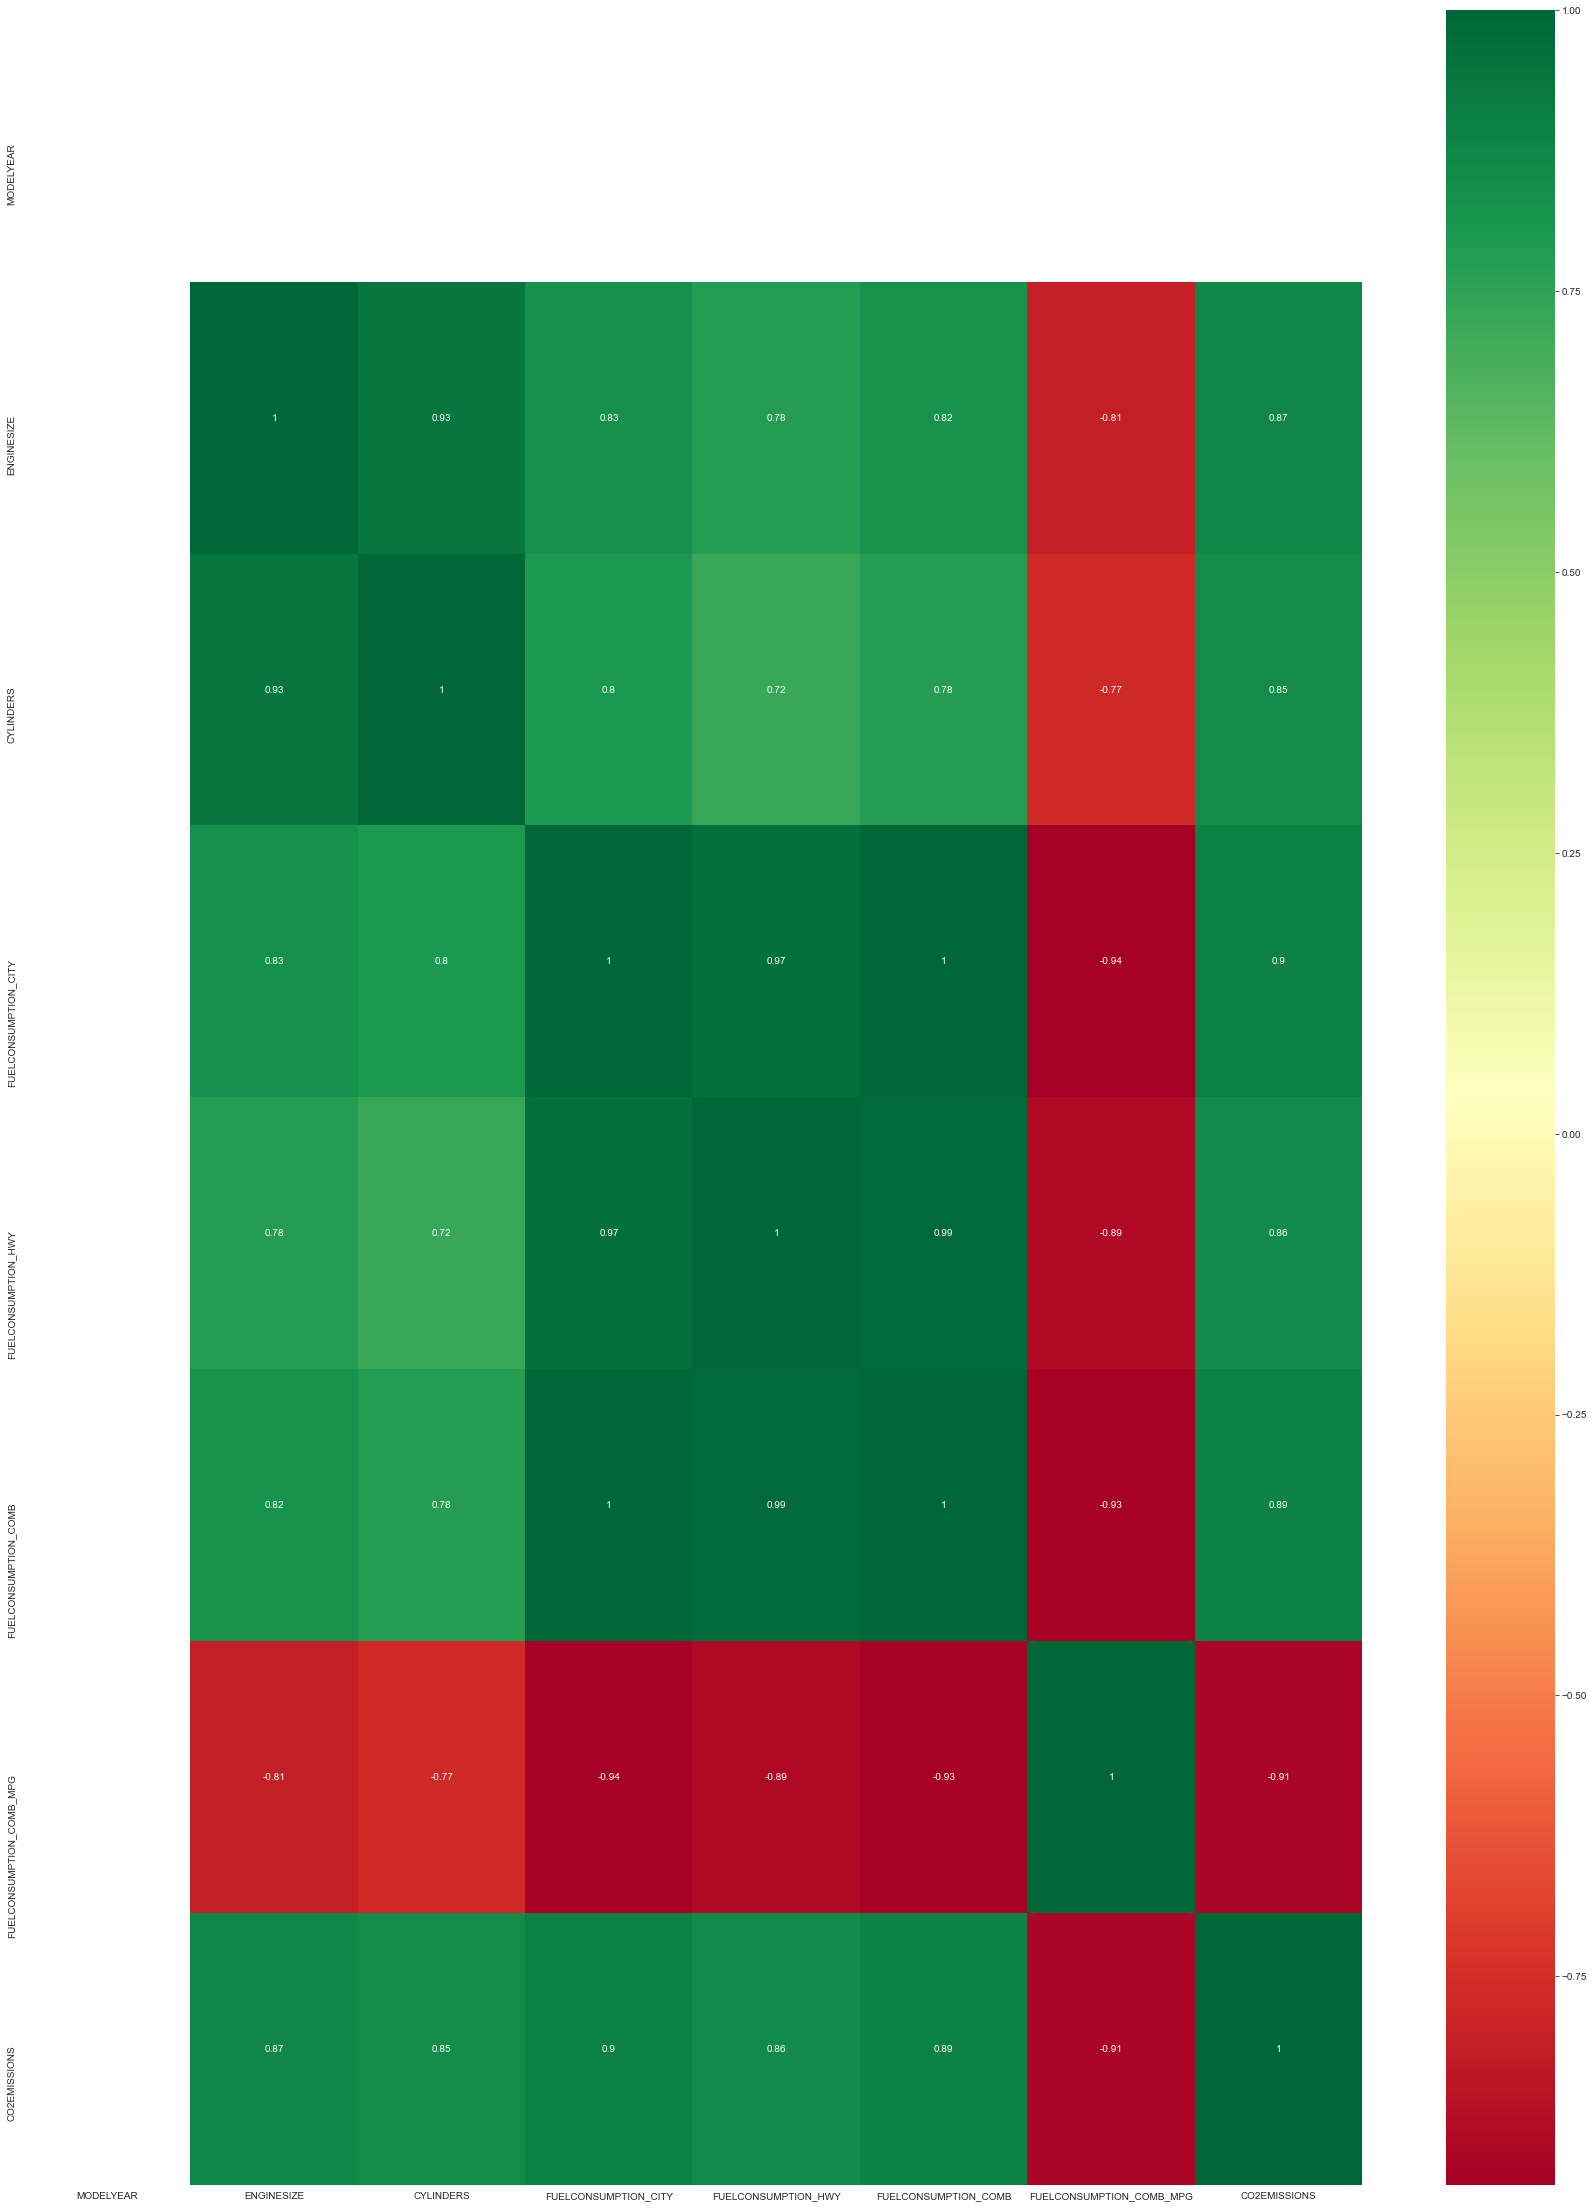

In [113]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,40))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024ED6843490>,
      dtype=object)

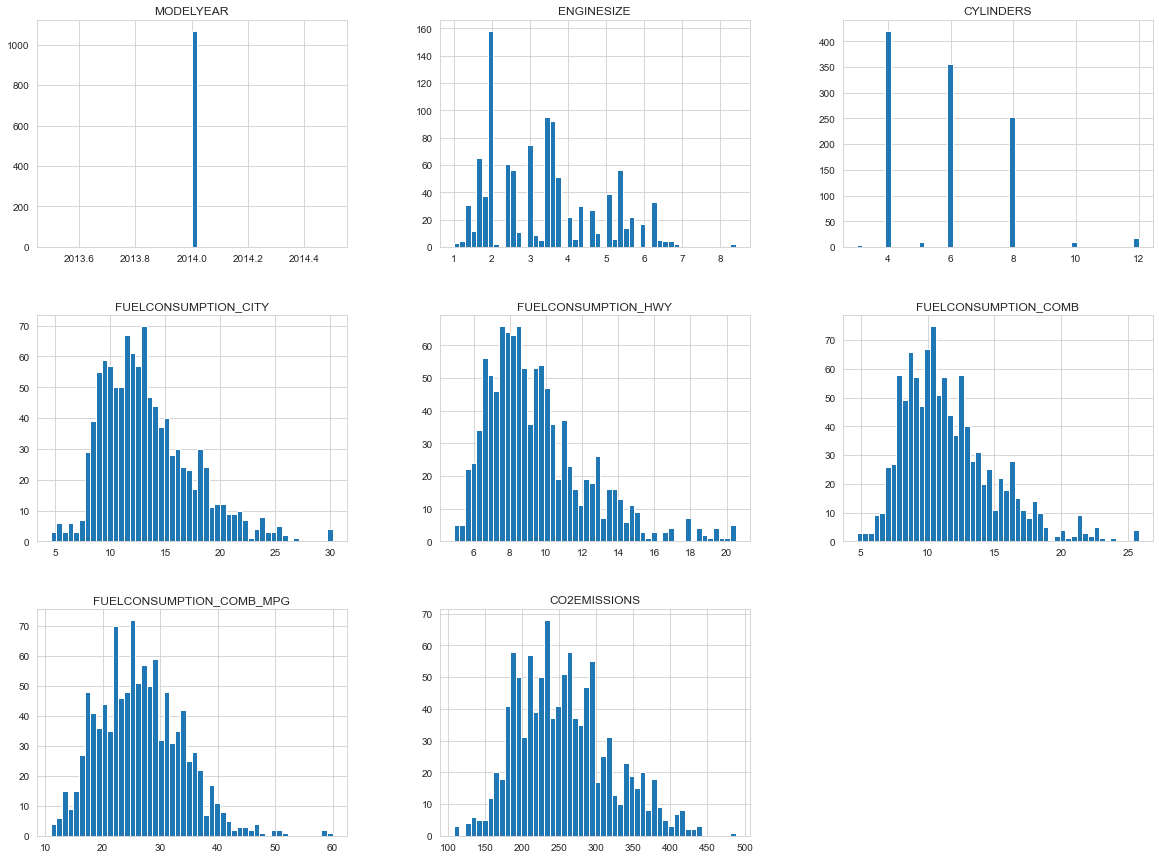

In [114]:
df.hist( bins =50, figsize= (20,15))

# Cleaning the Data


In [115]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

These are the columns heading. We have to analyze the headings which is necessary for us to select and remove the data from our model. 
Some of those data are just unnecessary and can occur noise to our model so it has to be removed.

In [116]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [117]:
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,271
1063,3.2,6,13.2,9.5,11.5,264
1064,3.0,6,13.4,9.8,11.8,271
1065,3.2,6,12.9,9.3,11.3,260


# Multiple Regression Model

In [118]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### np.random.rand(len(df))
randomly samples len(df) floating point numbers from the uniform (0, 1) distribution. Sampling from this distribution generates numbers between 0 and 1.

msk is a boolean array.

#### msk is True 
if the i-th value randomly generated by np.random.rand is less than (<) 0.8.

#### msk is False
if the i-th value randomly generated by np.random.rand is greater than or equal to (>=) 0.8.

~msk flips True to False and False to True. With this, the values of cdf where msk is True are assigned to the array train, and the values of cdf where msk is False are assigned to test.

With this set-up approximately 80% of cdf to be partitioned into train, and the remaining ~20% to be partitioned into test.

In [119]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)

LinearRegression()

# Prediction and Validation 

In [120]:
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.6463676   7.63187279  9.95293337]]


#### Model Coefficient 
f(x)=mx+b=y here m is the coefficient

f(x,a)=mx+da+b=y heare d and m are the coefficient

x and a will be input parameters

In [121]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

In [122]:
x1 = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y1 = np.asanyarray(test[['CO2EMISSIONS']])

In [123]:
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y1) ** 2))

Residual sum of squares: 525.64


In [124]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Variance score: 0.87


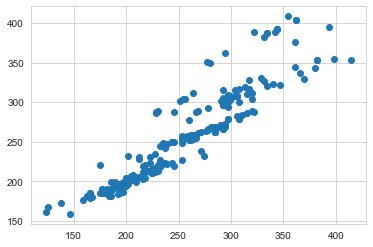

In [125]:
plt.scatter(y1,y_hat)

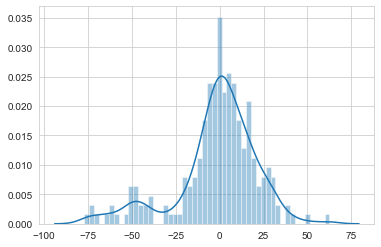

In [138]:
sns.distplot((y1-y_hat),bins=50); 

In [139]:
from sklearn import metrics

In [141]:
print('MAE:', metrics.mean_absolute_error(y1, y_hat))
print('MSE:', metrics.mean_squared_error(y1, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1, y_hat)))

MAE: 16.176720600681808
MSE: 537.1303832837169
RMSE: 23.17607350876582


Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand because it’s the average error.
MSE is more popular than MAE because MSE “punishes” larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE because RMSE is interpretable in the “y” units.
All of these are loss functions because we want to minimize them.

# Another Approach

In [142]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','ENGINESIZE','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)


Coefficients:  [[-11.09985093 -13.25622793  18.7489689   33.79949368]]


In [143]:
y_hat= regr.predict(test[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','ENGINESIZE','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','ENGINESIZE','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 537.13
Variance score: 0.84


# Basic Linear Regression



In [144]:
import statsmodels.api as sm

In [145]:
#Defining dependent and independent variable
X = df['ENGINESIZE']
X=sm.add_constant(X)

y = df['CO2EMISSIONS']

In [146]:
lm=sm.OLS(y,X)
model=lm.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     3451.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:56:31   Log-Likelihood:                -5169.9
No. Observations:                1067   AIC:                         1.034e+04
Df Residuals:                    1065   BIC:                         1.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.3041      2.420     51.779      0.000     120.556     130.053
ENGINESIZE    39.1252      0.666     58.741      0.000      37.818      40.432
==============================================================================
Omnibus:                       27.459   Durbin-Watson:                   0.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.194
Skew:                           0.126   Prob(JB):                     1.71e-12
Kurtosis:                       4.075   Cond. No.                         9.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
model.params

const         125.304099
ENGINESIZE     39.125200
dtype: float64

In [148]:
model.mse_model #mean squared error is too much. It is not good.

3271391.108185699

In [149]:
model.rsquared #Not bad

0.7641458597854816

In [150]:
model.rsquared_adj #Not bad

0.7639244004988952

In [151]:
model.fittedvalues[0:5] #Predicted values

0    203.554499
1    219.204579
2    183.991899
3    262.242299
4    262.242299
dtype: float64

In [152]:
model.fittedvalues[0:5] #Predicted values

0    203.554499
1    219.204579
2    183.991899
3    262.242299
4    262.242299
dtype: float64

In [153]:
y[0:5] #Real values

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64